# <font color=#225e71>Linear Regression</font>

In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv(r'C:\Users\Giorgis\Desktop\Projects\ADTA coursework\partI\Census.csv')
data.head()

data = data.dropna()

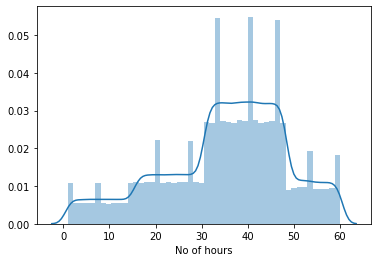

In [4]:
sns.distplot(data['No of hours'])

#### <font color=#225e71>Selecting the features attributes and the target on for training the model </font>

In [5]:
attributesX = list(data.columns)
attributesX.remove('No of hours')
attributesX.remove('Region')
attributesX.remove('Residence Type')
attributesX.remove('Person ID')
attributesX

['Family Composition',
 'Population Base',
 'Sex',
 'Age',
 'Marital Status',
 'Student',
 'Country of Birth',
 'Health',
 'Ethnic Group',
 'Religion',
 'Economic Activity',
 'Occupation',
 'Industry',
 'Hours worked per week',
 'Approximated Social Grade']

In [6]:
X = data[['Family Composition',
 'Population Base',
 'Sex',
 'Age',
 'Marital Status',
 'Student',
 'Country of Birth',
 'Health',
 'Ethnic Group',
 'Religion',
 'Economic Activity',
 'Occupation',
 'Industry',
 'Hours worked per week',
 'Approximated Social Grade']]

y = data['No of hours']

#### <font color=#225e71>Training the model</font>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
model = LinearRegression()

In [9]:
model.fit(X_train, y_train)

LinearRegression()

#### <font color=#225e71>Model's evaluation</font>

In [10]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8765408390460148


In [11]:
print('intercept:', model.intercept_)

intercept: -7.108943536118979


In [12]:
print('slope:', model.coef_)

slope: [ 1.55793234e-02 -1.44695167e-01 -4.64307402e-02 -8.76084529e-03
 -1.28364461e-02 -1.98239114e-01  2.03904665e-02  1.75623152e-02
  2.33015687e-02 -3.08593983e-03 -7.19355458e-02  3.09981395e-04
 -9.29057848e-03  1.56923983e+01 -1.53188569e-02]


In [41]:
df_coef = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
df_coef

,Coefficient
Family Composition,0.015579
Population Base,-0.144695
Sex,-0.046431
Age,-0.008761
Marital Status,-0.012836
Student,-0.198239
Country of Birth,0.020390
Health,0.017562
Ethnic Group,0.023302
Religion,-0.003086


#### <font color=#225e71>Predictions</font>

In [14]:
preds = model.predict(X_test)
for i in range(0, len(preds)):
    preds[i] = round(preds[i], 2)

In [15]:
len(y_test)
len(data['No of hours'])
len(preds)

80226

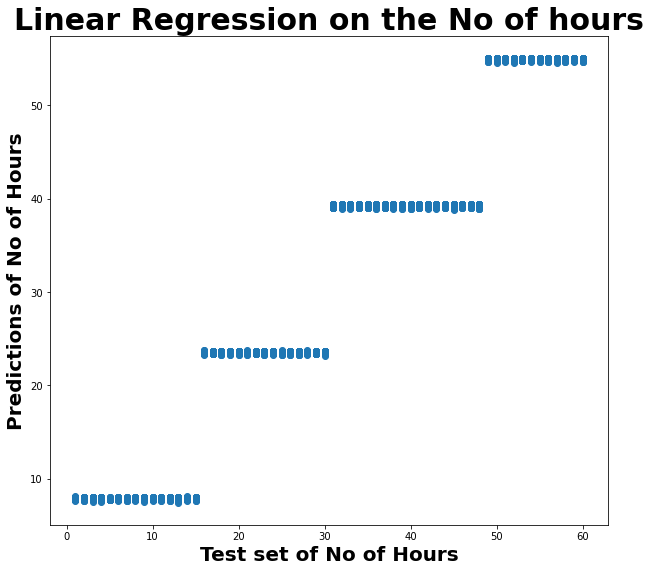

In [50]:
plt.figure(figsize=(10,9))
plt.scatter(y_test, preds)

plt.xlabel('Test set of No of Hours', size=20, fontweight='bold')
plt.ylabel('Predictions of No of Hours', size=20, fontweight='bold')
plt.title('Linear Regression on the No of hours', size=30, fontweight='bold')

plt.savefig('linregr.jpeg')

In [37]:
MAE = round(metrics.mean_absolute_error(y_test, preds), 2)
print("MAE:", MAE)

MAE: 4.08


In [38]:
MSE = round(metrics.mean_squared_error(y_test, preds),2)
print("MSE:", MSE)

MSE: 22.59


In [39]:
RMSE = round(np.sqrt(metrics.mean_squared_error(y_test, preds)),2)
print("RMSE:", RMSE)

RMSE: 4.75


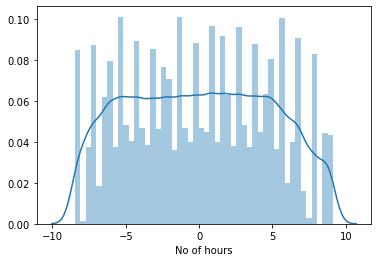

In [55]:
sns.distplot((y_test-preds))